### ANALYTICS IN CREDIT CARD INDUSTRY:
Analytics has penetrated every industry owing to the various technology platforms that
collect information and thus, the service providers know what exactly customers want. The
Credit Card industry is no exception. Within credit card payment processing, there is a
significant amount of data available that can be beneficial in countless ways.
#### Understanding the customer behaviour
The data available from a credit card processor identifies the types of consumer and their
business spending behaviors. Hence, developing the marketing campaigns to directly
address their behaviors indeed grows the revenue and these considerations will result in
greater sales.
#### Personalize offering based on data results
Data also reveals specific interests and needs in individual customers that a company can
leverage, this addressing their needs more efficiently. Specific promotions can be sent out
related to where these customers are located and this builds sales more quickly.
Use trends and patterns to get new customers
The transactions and activities of the existing customers that they do in terms of purchase
behavior tends to reflect larger trends that are coming. This information provides a strategy
to go after possible customers in the target audience.
#### Uncover suspicious activity
The data from credit card processing is becoming increasingly important as a tool to fight
fraud. When combined with artificial intelligence, this data is being analyzed quickly to
uncover areas of purchase activity.
#### Reduce chargebacks
The ability to detect suspicious activity and patterns in data can also assess whether or not a
transaction might result in a chargeback. Using analytics to track each transaction reveals
anomalies. This information can help you reject that transaction and save your business
from chargebacks.

<h4>BUSINESS PROBLEM:</h4><br />
In order to effectively produce quality decisions in the modern credit card industry, knowledge
must be gained through effective data analysis and modeling. Through the use of dynamic data-
driven decision-making tools and procedures, information can be gathered to successfully evaluate
all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries
across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and
collections, respond to customer requests for help with proactive offers and service.

The given data has the following forms:<br />
<b>Customer Acquisition:</b> At the time of card issuing, company maintains the details of customers.<br />
<b>Spend (Transaction data):</b> Credit card spend for each customer.<br />
<b>Repayment:</b> Credit card Payment done by customer.<br />

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import warnings
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
warnings.filterwarnings('ignore')

In [2]:
# Let's import the data first and try to understand the various features of it
cust_acq = pd.read_csv('Customer Acqusition.csv')
cust_acq.set_index(['No'], inplace=True)
cust_spend = pd.read_csv('spend.csv')
cust_spend.set_index(['Sl No:'], inplace=True)
cust_repayed = pd.read_csv('Repayment.csv')
cust_repayed.set_index(['SL No:'], inplace=True)

In [3]:
# Customer Acquisition Data
cust_acq.head(20)

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
6,A6,70,DELHI,Silver,100000.0,C6,Self Employed
7,A7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
8,A8,67,PATNA,Silver,100002.0,C8,Salaried_Pvt
9,A9,79,CHENNAI,Silver,100003.0,C9,Govt


In [4]:
# Correct the spelling "Platimum" to "Platinum"
cust_acq.loc[cust_acq['Product']=='Platimum', 'Product'] = 'Platinum'
cust_acq.head(10)

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platinum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platinum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platinum,10002.0,C5,Normal Salary
6,A6,70,DELHI,Silver,100000.0,C6,Self Employed
7,A7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
8,A8,67,PATNA,Silver,100002.0,C8,Salaried_Pvt
9,A9,79,CHENNAI,Silver,100003.0,C9,Govt


In [5]:
# Customer Spend Data
cust_spend.head(5)

,Customer,Month,Type,Amount
Sl No:,,,,
1,A1,12-Jan-04,JEWELLERY,485470.80
2,A1,3-Jan-04,PETRO,410556.13
3,A1,15-Jan-04,CLOTHES,23740.46
4,A1,25-Jan-04,FOOD,484342.47
5,A1,17-Jan-05,CAMERA,369694.07


In [6]:
# Customer Repayments Data
cust_repayed.head(5)

,Customer,Month,Amount
SL No:,,,
1,A1,12-Jan-04,495414.75
2,A1,3-Jan-04,245899.02
3,A1,15-Jan-04,259490.06
4,A1,25-Jan-04,437555.12
5,A1,17-Jan-05,165972.88


In [7]:
# Before doing any kind of analysis, let us check the missing values in the three datasets
cust_acq.shape[0] - cust_acq.count()
# No missings in Customer Acquisition Data

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [8]:
cust_spend.shape[0] - cust_spend.count()
# No missings in Customer Spends Data

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [9]:
cust_repayed.shape[0] - cust_repayed.count()
# No missings in Customer Repayments Data

Customer    0
Month       0
Amount      0
dtype: int64

In [10]:
# Create backup datasets for Parts 2, 3, 4 and 5 of the problem
cust_acq_bckup = cust_acq.copy()
cust_spend_bckup = cust_spend.copy()
cust_repayed_bckup = cust_repayed.copy()

### Part 1
<b>1a) - In case age is less than 18, replace it with mean of age values.</b>

In [11]:
cust_acq[cust_acq['Age'] < 18]['Age'] = cust_acq.Age.mean()

<b>1b) - In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card) </b>

In [12]:
for (customer, max_limit) in zip(list(cust_acq['Customer']), list(cust_acq['Limit'])):
    cust_spend.loc[(cust_spend['Customer']==customer) & (cust_spend['Amount'] > max_limit), 'Amount'] = max_limit* 0.5

<b>1c) - Incase the repayment amount is more than the limit, replace the repayment with the
limit.</b>

In [13]:
for (customer, max_limit) in zip(list(cust_acq['Customer']), list(cust_acq['Limit'])):
    cust_repayed.loc[(cust_repayed['Customer']==customer) & (cust_repayed['Amount'] > max_limit), 'Amount'] = max_limit

### Part 2

In [14]:
cust_acq = cust_acq_bckup.copy()
cust_spend = cust_spend_bckup.copy()
cust_repayed = cust_repayed_bckup.copy()

<b>2a) - How many distinct customers exist?</b>

In [15]:
grp = cust_acq.groupby(['Company', 'Age', 'City'])[['Customer']].count()
grp[grp['Customer']>1]

,,,Customer
Company,Age,City,


From above analysis, after we group the data we see there are 100 distinct customers<br />
<b>2b) - How many distinct categories exist?</b>

In [16]:
# It's not correctly mentioned in the question but here I am making a correction of 1, 2, 3 Rs extra added in the Credit limit 
# originally
# Assuming that these additions were wrongly present in the original data
# cust_acq.loc[cust_acq['Limit']==10001.0, 'Limit'] = 10000.0
# cust_acq.loc[cust_acq['Limit']==10001.0, 'Limit'] = 10000.0
# cust_acq.loc[cust_acq['Limit']==10002.0, 'Limit'] = 10000.0
# cust_acq.loc[cust_acq['Limit']==100001.0, 'Limit'] = 100000.0
# cust_acq.loc[cust_acq['Limit']==100002.0, 'Limit'] = 100000.0
# cust_acq.loc[cust_acq['Limit']==100003.0, 'Limit'] = 100000.0

In [17]:
dist_cat = cust_acq.groupby(['Product', 'Limit'])[['Customer']].count().add_prefix("No. Of ").add_suffix("s")
dist_cat.reset_index().pivot(index="Limit", columns="Product", values="No. Of Customers").fillna(0)

Product,Gold,Platinum,Silver
Limit,,,
10000.0,0.0,5.0,0.0
10001.0,0.0,5.0,0.0
10002.0,0.0,7.0,0.0
100000.0,0.0,2.0,10.0
100001.0,0.0,2.0,5.0
100002.0,0.0,2.0,5.0
100003.0,0.0,2.0,5.0
500000.0,38.0,7.0,5.0


Based on the above table, it can be clearly seen that these are 24 distinct segments of customers :<br />
- 32 Platinum customers having credit limits of 10000INR for 17 of them, 100000INR for 8 of them and 500000INR for 7 of them
- 38 Gold customers having Credit Limit of 500000INR
- 30 Silver customers having credit limit of 100000INR for 25 of them and 500000INR for 5 of them<br />
<b>Thus, making a total of 3 segments with subcategories based on credit limits</b><br />

Let's see the composition of the varieties of customers we have in the data below !

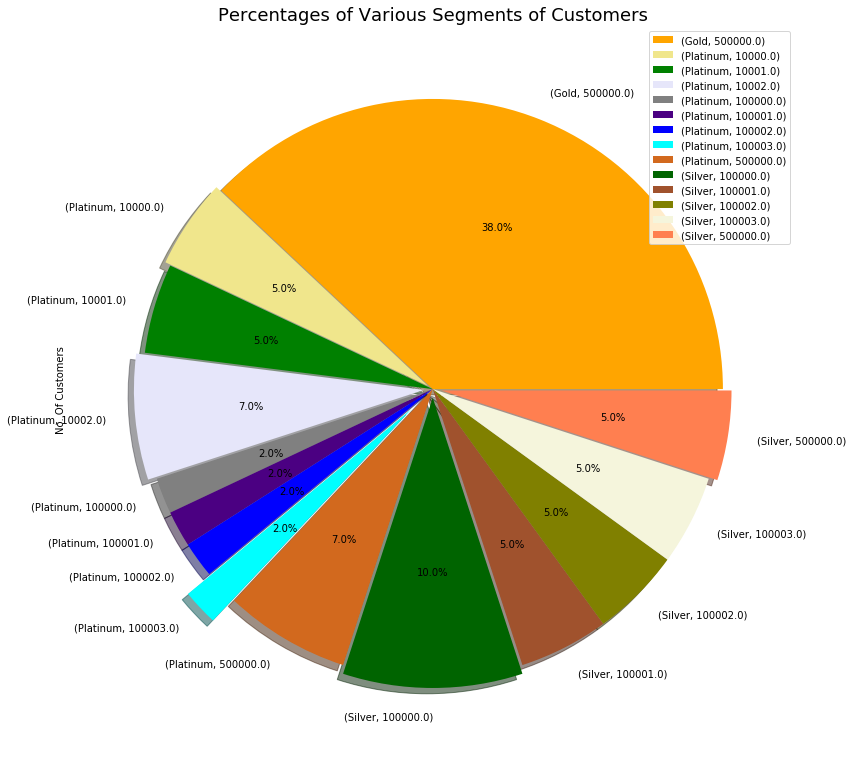

In [18]:
explode = (0, 0.02, 0, 0.03, 0, 0., 0, 0.1, 0, 0.03, 0, 0, 0, 0.03)  
dist_cat.plot(kind='pie', y='No. Of Customers', shadow=True, autopct='%1.1f%%',explode=explode, colors=['orange', 'khaki', 'green', 'lavender', 'grey', 'indigo', 'blue', 'aqua', 'chocolate', 'darkgreen', 'sienna', 'olive', 'beige', 'coral'])
plt.legend(loc="upper right")
plt.title('Percentages of Various Segments of Customers', fontsize=18)
plt.xticks(fontsize=20)
plt.gcf().set_size_inches(13,27)

In [19]:
cust_acq

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platinum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platinum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platinum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt
98,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary


In [20]:
# Let's add a product category to them
cust_acq['Prod Cat'] = np.nan
# Gold has only one level that is CR limit of 500000
cust_acq.loc[(cust_acq.Limit==500000) & (cust_acq.Product=="Gold"), 'Prod Cat'] = 'G1'

# Platinum has 8 levels as below
cust_acq.loc[(cust_acq.Limit==10000) & (cust_acq.Product=="Platinum"), 'Prod Cat'] = 'P8'
cust_acq.loc[(cust_acq.Limit==10001) & (cust_acq.Product=="Platinum"), 'Prod Cat'] = 'P7'
cust_acq.loc[(cust_acq.Limit==10002) & (cust_acq.Product=="Platinum"), 'Prod Cat'] = 'P6'
cust_acq.loc[(cust_acq.Limit==100000) & (cust_acq.Product=="Platinum"), 'Prod Cat'] = 'P5'
cust_acq.loc[(cust_acq.Limit==100001) & (cust_acq.Product=="Platinum"), 'Prod Cat'] = 'P4'
cust_acq.loc[(cust_acq.Limit==100002) & (cust_acq.Product=="Platinum"), 'Prod Cat'] = 'P3'
cust_acq.loc[(cust_acq.Limit==100003) & (cust_acq.Product=="Platinum"), 'Prod Cat'] = 'P2'
cust_acq.loc[(cust_acq.Limit==500000) & (cust_acq.Product=="Platinum"), 'Prod Cat'] = 'P1'

# Silver also has 8 levels as below
cust_acq.loc[(cust_acq.Limit==10000) & (cust_acq.Product=="Silver"), 'Prod Cat'] = 'S8'
cust_acq.loc[(cust_acq.Limit==10001) & (cust_acq.Product=="Silver"), 'Prod Cat'] = 'S7'
cust_acq.loc[(cust_acq.Limit==10002) & (cust_acq.Product=="Silver"), 'Prod Cat'] = 'S6'
cust_acq.loc[(cust_acq.Limit==100000) & (cust_acq.Product=="Silver"), 'Prod Cat'] = 'S5'
cust_acq.loc[(cust_acq.Limit==100001) & (cust_acq.Product=="Silver"), 'Prod Cat'] = 'S4'
cust_acq.loc[(cust_acq.Limit==100002) & (cust_acq.Product=="Silver"), 'Prod Cat'] = 'S3'
cust_acq.loc[(cust_acq.Limit==100003) & (cust_acq.Product=="Silver"), 'Prod Cat'] = 'S2'
cust_acq.loc[(cust_acq.Limit==500000) & (cust_acq.Product=="Silver"), 'Prod Cat'] = 'S1'

<b>2c) - What is the average monthly spend by customers?</b>

In [21]:
# For this let's create a new column having Month data for each spend transaction on the customer's part
import re
pattern1 = r'[A-z]+'  # Create a normal regex pattern to carve out the month abbreviation, since the month column is not of datetime type
ptr_mon = re.compile(pattern1)
pattern2 = r'[\d]{2}$'
ptr_year = re.compile(pattern2)


def getMon(x):
    month = []
    year = []
    if x==1: # For Customer Spend        
        for _ in list(cust_spend['Month']):
            month.append(ptr_mon.findall(_)[0])
            year.append(ptr_year.findall(_)[0])
        year = ["20"+y for y in year]
        mondf = pd.DataFrame(month, index=cust_spend.index)
        mondf.columns = ['Mon']
        yeardf = pd.DataFrame(year, index=cust_spend.index)
        yeardf.columns = ['Year']
        return mondf, yeardf
    else:    # For Customer Repayments
        for _ in list(cust_repayed['Month']):
            month.append(ptr_mon.findall(_)[0])
            year.append(ptr_year.findall(_)[0])
        mondf = pd.DataFrame(month, index=cust_repayed.index)
        mondf.columns = ['Mon']
        year = ["20"+y for y in year]
        yeardf = pd.DataFrame(year, index=cust_repayed.index)
        yeardf.columns = ['Year']
        return mondf, yeardf        

In [22]:
mon, yr = getMon(1)
cust_spend = pd.concat([cust_spend, mon, yr], axis=1)
cust_spend['Year'] = pd.to_numeric(cust_spend['Year'])
cust_spend.head(10)

,Customer,Month,Type,Amount,Mon,Year
Sl No:,,,,,,
1,A1,12-Jan-04,JEWELLERY,485470.80,Jan,2004
2,A1,3-Jan-04,PETRO,410556.13,Jan,2004
3,A1,15-Jan-04,CLOTHES,23740.46,Jan,2004
4,A1,25-Jan-04,FOOD,484342.47,Jan,2004
5,A1,17-Jan-05,CAMERA,369694.07,Jan,2005
6,A1,23-Feb-05,SANDALS,168285.60,Feb,2005
7,A1,1-Feb-05,CAR,23370.20,Feb,2005
8,A8,5-Feb-04,BIKE,155562.58,Feb,2004
9,A9,28-Feb-05,AUTO,38269.94,Feb,2005


In [23]:
mon_1, yr_1 = getMon(2)
cust_repayed = pd.concat([cust_repayed, mon_1, yr_1], axis=1)
cust_repayed['Year'] = pd.to_numeric(cust_repayed['Year'])
cust_repayed.head(10)

,Customer,Month,Amount,Mon,Year
SL No:,,,,,
1,A1,12-Jan-04,495414.75,Jan,2004
2,A1,3-Jan-04,245899.02,Jan,2004
3,A1,15-Jan-04,259490.06,Jan,2004
4,A1,25-Jan-04,437555.12,Jan,2004
5,A1,17-Jan-05,165972.88,Jan,2005
6,A1,23-Feb-05,365366.62,Feb,2005
7,A1,1-Feb-05,14473.41,Feb,2005
8,A8,5-Feb-04,156913.59,Feb,2004
9,A9,28-Feb-05,417294.81,Feb,2005


In [24]:
# Since from mere observations we see that the data gives is for the years 2004(a leap year), 2005 and 2006.
# Hence, I will split these three years data and calculate average monthly expenditures for these 3 years

# Find total Monthwise spends for each customer first -> this gives the number of months when expenditures were done also
spend_2004 = cust_spend[cust_spend.Year==2004].groupby(['Customer', 'Mon'], sort=False)[['Amount']].sum().reset_index()
# Now find the total spend for each customer
temp_2004 = cust_spend[cust_spend.Year==2004].groupby(['Customer'], sort=False)[['Amount']].sum().reset_index()
# Above two DFs are used for calculating sum(total expenditures)/(total # of months when customer spent money)

# Similary, the above logic is extended for years 2005 and 2006 as well below
spend_2005 = cust_spend[cust_spend.Year==2005].groupby(['Customer', 'Mon'], sort=False)[['Amount']].sum().reset_index()
temp_2005 = cust_spend[cust_spend.Year==2005].groupby(['Customer'], sort=False)[['Amount']].sum().reset_index()

spend_2006 = cust_spend[cust_spend.Year==2006].groupby(['Customer', 'Mon'], sort=False)[['Amount']].sum().reset_index()
temp_2006 = cust_spend[cust_spend.Year==2006].groupby(['Customer'], sort=False)[['Amount']].sum().reset_index()

# Some emplty lists which help in formulating final dataframe
col_cust = []
col_2004 = []
col_2005 = []
col_2006 = []
for cust in list(cust_acq['Customer']):
    x_2004 = list(temp_2004[temp_2004['Customer']==cust]['Amount'])
    x_2005 = list(temp_2005[temp_2005['Customer']==cust]['Amount'])
    x_2006 = list(temp_2006[temp_2006['Customer']==cust]['Amount'])
    col_cust.append(cust)
    if len(x_2004)==0:  # If customer did not spend at all in year 2004
        col_2004.append(0)
    else:               # Else append the average monthly expenditure value as below
        col_2004.append(x_2004[0]/spend_2004[spend_2004['Customer']==cust].shape[0])
    
    # Similaryly extend the same logic for years 2005 and 2006 below
    if len(x_2005)==0:
        col_2005.append(0)
    else:
        col_2005.append(x_2005[0]/spend_2005[spend_2005['Customer']==cust].shape[0])
        
    if len(x_2006)==0:
        col_2006.append(0)
    else:
        col_2006.append(x_2006[0]/spend_2006[spend_2006['Customer']==cust].shape[0])
    
# Finally create the consolidated dataframe
mon_avg_spend = pd.DataFrame.from_dict({'Customers':col_cust, 
                                        'Monthly Average for 2004': col_2004, 
                                        'Monthly Average for 2005': col_2005,
                                        'Monthly Average for 2006': col_2006,})
mon_avg_spend.set_index('Customers').to_csv('Average Monthly Expenditures.csv')
mon_avg_spend = mon_avg_spend.set_index('Customers').reset_index()
mon_avg_spend

,Customers,Monthly Average for 2004,Monthly Average for 2005,Monthly Average for 2006
0,A1,8.843313e+05,430468.895000,383916.590000
1,A2,4.632673e+05,345781.205000,247032.125000
2,A3,7.867770e+05,300793.780000,327823.927500
3,A4,2.940141e+05,79500.246667,572590.540000
4,A5,1.263700e+06,515182.060000,306368.696667
...,...,...,...,...
95,A96,5.472966e+04,0.000000,0.000000
96,A97,1.390183e+05,0.000000,0.000000
97,A98,2.845211e+05,0.000000,0.000000
98,A99,9.018422e+04,0.000000,0.000000


In [25]:
# Here we visualize the average monthly expenditures via a line chart for the years 2004, 2005 and 2006 for all customers
# The figure has been saved in the same directory as 'Monthly Average Expenditures.pdf'

# Update font sizes/other params first
params = {'legend.fontsize': 'xx-large',
          #'figure.figsize': (30, 12),
         'axes.labelsize': 'xx-large',
         'figure.titlesize':'xx-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
with PdfPages('Monthly Average Expenditures.pdf') as pdf:
    plt.plot(mon_avg_spend['Customers'], mon_avg_spend['Monthly Average for 2004'], marker='o', linewidth=3, label='Monthly Average Spend(2004)')
    plt.plot(mon_avg_spend['Customers'], mon_avg_spend['Monthly Average for 2005'], marker='o', linewidth=3, label='Monthly Average Spend(2005)')
    plt.plot(mon_avg_spend['Customers'], mon_avg_spend['Monthly Average for 2006'], marker='o', linewidth=3, label='Monthly Average Spend(2006)')
    plt.legend(loc="upper left")
    plt.suptitle('Monthly Average Expenditures', fontsize=35)
    plt.xlabel('Customers', fontsize=30)
    plt.ylabel('Average Amount', fontsize=30)
    plt.gca().grid(True)
    plt.gcf().set_size_inches(50,20)
    pdf.savefig()
    plt.close()

Below are the inferences made from the above saved figure -<br />
1) For the year 2004:<br />
- Customers A5, A7, A39, A47 and A55 have spent a lot
- Customers A63, A64, A69, A70, A71, A73-A92 had 0 expenditures (They didn't spend a single dime)<br />

2) For the year 2005:<br />
- Customer A27 had considerable expenditures considering the credit limit of 50000
- Customers A67, A68, A77-A100 had 0 expenditures<br />

3) For the year 2006:<br />
- Customer A43 had the highest expenditure having credit limit of 500000
- Customers A65, 66, A72-A76, A93-A100

<b>2d) - What is the average monthly repayment by customers?</b>

In [26]:
# Since from mere observations we see that the data gives is for the years 2004(a leap year), 2005 and 2006.
# Hence, I will split these three years data and calculate average monthly repayments for these 3 years

# Find total Monthwise repayments for each customer first -> this gives the number of months when repayments were done also
repayed_2004 = cust_repayed[cust_repayed.Year==2004].groupby(['Customer', 'Mon'], sort=False)[['Amount']].sum().reset_index()
# Now find the total repayments for each customer
temp_2004 = cust_repayed[cust_repayed.Year==2004].groupby(['Customer'], sort=False)[['Amount']].sum().reset_index()
# Above two DFs are used for calculating sum(total repayments)/(total # of months when customer repayed the money)

# Similary, the above logic is extended for years 2005 and 2006 as well below
repayed_2005 = cust_repayed[cust_repayed.Year==2005].groupby(['Customer', 'Mon'], sort=False)[['Amount']].sum().reset_index()
temp_2005 = cust_spend[cust_repayed.Year==2005].groupby(['Customer'], sort=False)[['Amount']].sum().reset_index()

repayed_2006 = cust_repayed[cust_repayed.Year==2006].groupby(['Customer', 'Mon'], sort=False)[['Amount']].sum().reset_index()
temp_2006 = cust_repayed[cust_repayed.Year==2006].groupby(['Customer'], sort=False)[['Amount']].sum().reset_index()

# Some empty lists which help in formulating final dataframe
col_cust = []
col_2004 = []
col_2005 = []
col_2006 = []
for cust in list(cust_acq['Customer']):
    x_2004 = list(temp_2004[temp_2004['Customer']==cust]['Amount'])
    x_2005 = list(temp_2005[temp_2005['Customer']==cust]['Amount'])
    x_2006 = list(temp_2006[temp_2006['Customer']==cust]['Amount'])
    col_cust.append(cust)
    if len(x_2004)==0:  # If customer did not spend at all in year 2004
        col_2004.append(0)
    else:               # Else append the average monthly expenditure value as below
        col_2004.append(x_2004[0]/repayed_2004[repayed_2004['Customer']==cust].shape[0])
    
    # Similaryly extend the same logic for years 2005 and 2006 below
    if len(x_2005)==0:
        col_2005.append(0)
    else:
        col_2005.append(x_2005[0]/repayed_2005[repayed_2005['Customer']==cust].shape[0])
        
    if len(x_2006)==0:
        col_2006.append(0)
    else:
        col_2006.append(x_2006[0]/repayed_2006[repayed_2006['Customer']==cust].shape[0])
    
# Finally create the consolidated dataframe
mon_avg_repayed = pd.DataFrame.from_dict({'Customers':col_cust, 
                                        'Monthly Average for 2004': col_2004, 
                                        'Monthly Average for 2005': col_2005,
                                        'Monthly Average for 2006': col_2006,})
mon_avg_repayed.set_index('Customers').to_csv('Average Monthly Repayments.csv')
mon_avg_repayed = mon_avg_repayed.set_index('Customers').reset_index()
mon_avg_repayed

,Customers,Monthly Average for 2004,Monthly Average for 2005,Monthly Average for 2006
0,A1,1.179899e+06,381809.572500,288245.0200
1,A2,2.704463e+05,435586.436667,319161.5500
2,A3,3.227571e+05,312337.762500,200850.3600
3,A4,2.862317e+05,91264.863333,251730.8725
4,A5,5.631931e+05,230722.382000,374242.9700
...,...,...,...,...
95,A96,3.109923e+05,0.000000,0.0000
96,A97,1.218749e+05,0.000000,0.0000
97,A98,3.378156e+05,0.000000,0.0000
98,A99,2.568273e+04,0.000000,0.0000


In [27]:
# Here we visualize the average monthly repayments via a line chart for the years 2004, 2005 and 2006 for all customers
# The figure has been saved in the same directory as 'Monthly Average Repayments.pdf'

# Update font sizes/other params first
params = {'legend.fontsize': 'xx-large',
          #'figure.figsize': (30, 12),
         'axes.labelsize': 'xx-large',
         'figure.titlesize':'xx-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
with PdfPages('Monthly Average Repayments.pdf') as pdf:
    plt.plot(mon_avg_repayed['Customers'], mon_avg_repayed['Monthly Average for 2004'], marker='o', linewidth=3, label='Monthly Average Repayment(2004)')
    plt.plot(mon_avg_repayed['Customers'], mon_avg_repayed['Monthly Average for 2005'], marker='o', linewidth=3, label='Monthly Average Repayment(2005)')
    plt.plot(mon_avg_repayed['Customers'], mon_avg_repayed['Monthly Average for 2006'], marker='o', linewidth=3, label='Monthly Average Repayment(2006)')
    plt.legend(loc="upper left")
    plt.suptitle('Monthly Average Repayments', fontsize=35)
    plt.xlabel('Customers', fontsize=30)
    plt.ylabel('Average Amount', fontsize=30)
    plt.gca().grid(True)
    plt.gcf().set_size_inches(50,20)
    pdf.savefig()
    plt.close()

<b>2e) - If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?<br />
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)</b>

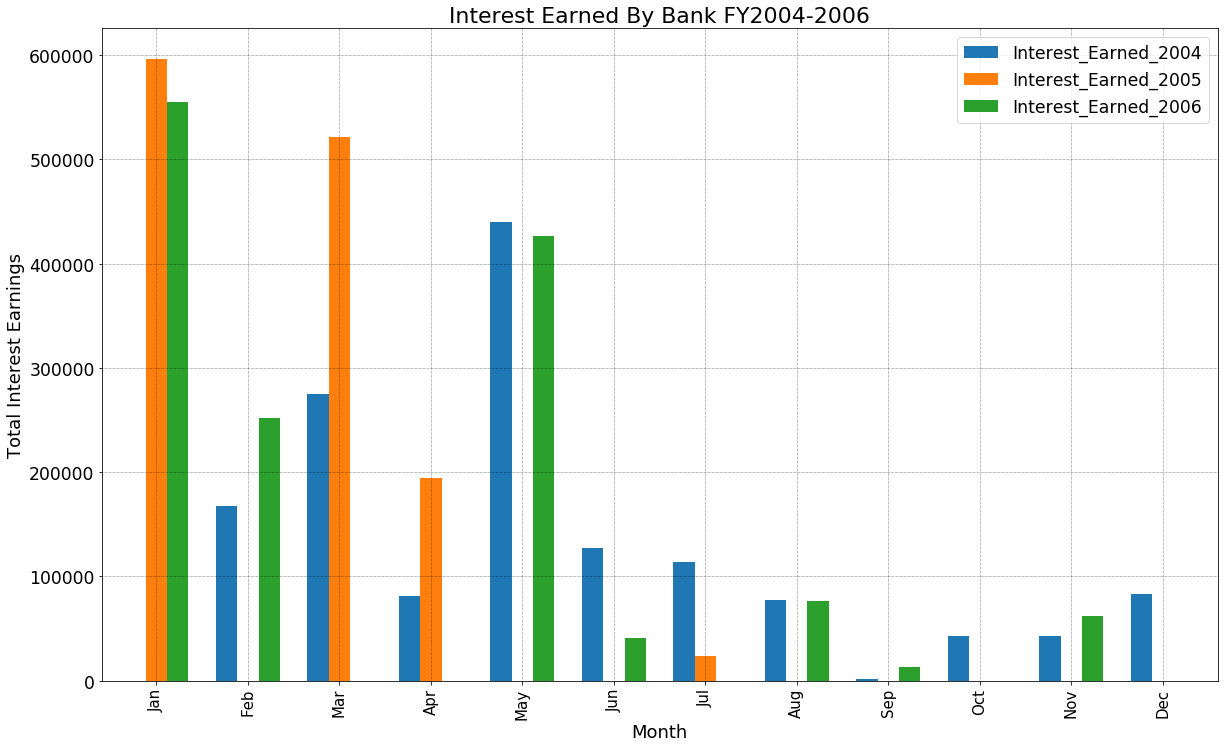

In [28]:
# FY 2004:
mon_spend_2004 = cust_spend[cust_spend['Year']==2004].groupby(['Mon'], sort=False)[['Amount']].sum().rename({'Amount':'Amount Spent'}, axis=1)
mon_repayed_2004 = cust_repayed[cust_spend['Year']==2004].groupby(['Mon'], sort=False)[['Amount']].sum().rename({'Amount':'Amount Repayed'}, axis=1)
monthly_profits_2004 = pd.concat([mon_spend_2004, mon_repayed_2004], axis=1)
#monthly_profits_2004 = monthly_profits_2004.reset_index()
monthly_profits_2004['Amount Spent'] = monthly_profits_2004['Amount Spent'].fillna(0)
monthly_profits_2004['Profit'] = monthly_profits_2004['Amount Repayed'] - monthly_profits_2004['Amount Spent']
monthly_profits_2004 = monthly_profits_2004.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

monthly_profits_2004.loc[monthly_profits_2004['Profit']<0, 'Profit'] = 0
monthly_profits_2004['Interest_Earned_2004'] = monthly_profits_2004[monthly_profits_2004['Profit']>0]['Profit'] * 0.029
monthly_profits_2004['Interest_Earned_2004'] = monthly_profits_2004['Interest_Earned_2004'].fillna(0)

# FY 2005:
mon_spend_2005 = cust_spend[cust_spend['Year']==2005].groupby(['Mon'], sort=False)[['Amount']].sum().rename({'Amount':'Amount Spent'}, axis=1)
mon_repayed_2005 = cust_repayed[cust_spend['Year']==2005].groupby(['Mon'], sort=False)[['Amount']].sum().rename({'Amount':'Amount Repayed'}, axis=1)
monthly_profits_2005 = pd.concat([mon_spend_2005, mon_repayed_2005], axis=1)
#monthly_profits_2005 = monthly_profits_2005.reset_index()
monthly_profits_2005['Amount Spent'] = monthly_profits_2005['Amount Spent'].fillna(0)
monthly_profits_2005['Profit'] = monthly_profits_2005['Amount Repayed'] - monthly_profits_2005['Amount Spent']
monthly_profits_2005 = monthly_profits_2005.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

monthly_profits_2005.loc[monthly_profits_2004['Profit']<0, 'Profit'] = 0
monthly_profits_2005['Interest_Earned_2005'] = monthly_profits_2005[monthly_profits_2005['Profit']>0]['Profit'] * 0.029
monthly_profits_2005['Interest_Earned_2005'] = monthly_profits_2005['Interest_Earned_2005'].fillna(0)

# FY 2006:
mon_spend_2006 = cust_spend[cust_spend['Year']==2006].groupby(['Mon'], sort=False)[['Amount']].sum().rename({'Amount':'Amount Spent'}, axis=1)
mon_repayed_2006 = cust_repayed[cust_spend['Year']==2006].groupby(['Mon'], sort=False)[['Amount']].sum().rename({'Amount':'Amount Repayed'}, axis=1)
monthly_profits_2006 = pd.concat([mon_spend_2006, mon_repayed_2006], axis=1)
#monthly_profits_2006 = monthly_profits_2006.reset_index()
monthly_profits_2006['Amount Spent'] = monthly_profits_2006['Amount Spent'].fillna(0)
monthly_profits_2006['Profit'] = monthly_profits_2006['Amount Repayed'] - monthly_profits_2006['Amount Spent']
monthly_profits_2006 = monthly_profits_2006.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

monthly_profits_2006.loc[monthly_profits_2006['Profit']<0, 'Profit'] = 0
monthly_profits_2006['Interest_Earned_2006'] = monthly_profits_2006[monthly_profits_2006['Profit']>0]['Profit'] * 0.029
monthly_profits_2006['Interest_Earned_2006'] = monthly_profits_2006['Interest_Earned_2006'].fillna(0)

total_monthly_profits = pd.concat([monthly_profits_2004['Interest_Earned_2004'], monthly_profits_2005['Interest_Earned_2005'], monthly_profits_2006['Interest_Earned_2006']], axis=1)
total_monthly_profits.to_csv("Total Monthwise Interest Earnings of the bank.csv")
total_monthly_profits.plot(kind='bar', width=0.7)
plt.legend(loc="upper right")
plt.title('Interest Earned By Bank FY2004-2006', fontsize=22)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Total Interest Earnings', fontsize=18)
plt.xticks(fontsize=15)
plt.gca().grid(True)
plt.gcf().set_size_inches(20,12)

From the above figure it is clearly explanable that the top highest interest earnings of the bank were in the year 2005 for the months January and March.<br /> Also, in year 2006 the second highest interest earnings went up in the month of January.
Its looks like period Jan-May is the high interesting earning period for our bank !<br />
Also the year 2004 didn't seem to show spikes in terms of the interest earnings of the bank, not much earnings there I believe.

<b>2f) - What are the top 5 product types?</b>

In [29]:
cust_spend['Age Category'] = ""
cust_spend['Prod Cat'] = np.nan
cust_repayed['Prod Cat'] = np.nan
cust_repayed['City'] = np.nan
cust_repayed['Product'] = np.nan
for cust in list(cust_acq['Customer']):
    age = cust_acq[cust_acq.Customer==cust]['Age'].to_list()[0]
    cust_spend.loc[cust_spend.Customer==cust, 'Prod Cat'] = cust_acq[cust_acq.Customer==cust]['Prod Cat'].to_list()[0]
    cust_repayed.loc[cust_repayed.Customer==cust, 'Prod Cat'] = cust_acq[cust_acq.Customer==cust]['Prod Cat'].to_list()[0]
    cust_repayed.loc[cust_repayed.Customer==cust, 'Product'] = cust_acq[cust_acq.Customer==cust]['Product'].to_list()[0]
    cust_repayed.loc[cust_repayed.Customer==cust, 'City'] = cust_acq[cust_acq.Customer==cust]['City'].to_list()[0]
    cust_spend.loc[cust_spend.Customer==cust, 'Prod Cat'] = cust_acq[cust_acq.Customer==cust]['Prod Cat'].to_list()[0]
    cust_spend.loc[cust_spend.Customer==cust, 'Product'] = cust_acq[cust_acq.Customer==cust]['Product'].to_list()[0]
    cust_spend.loc[cust_spend.Customer==cust, 'Age'] = age 
cust_spend.groupby(['Product', 'Prod Cat'])[['Customer']].count().rename({'Customer':'Count'}, axis=1).sort_values('Count', ascending=False)

Count
Product  Prod Cat       
Gold     G1          610
Platinum P1          179
Silver   S5          118
Platinum P6           99
Silver   S2           66
         S3           66
Platinum P7           65
         P8           65
Silver   S4           65
Platinum P2           49
         P3           49
         P4           32
         P5           32
Silver   S1            5

The top 5 products based on their customer issuance are :<br />
- "Gold 1" - Credit Limit of 500000
- "Platinum 1" - Credit Limit of 500000
- "Silver 5" - Credit Limit of 100000
- "Platinum 6" - Credit Limit of 10002
- "Silver 2" - Credit Limit of 100003

<b>2g) - Which city is having maximum spend ?</b>

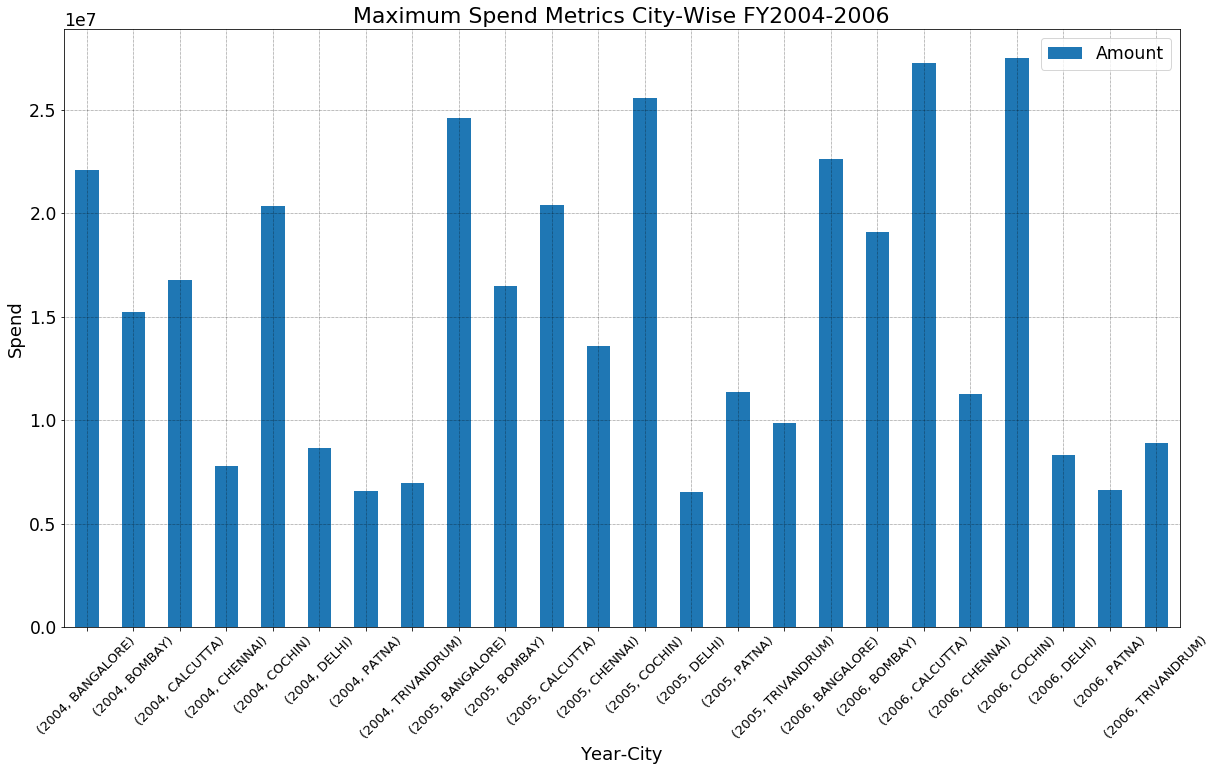

In [30]:
cust_spend['City'] = ""
for cust in list(cust_acq['Customer']):
    city = str(cust_acq[cust_acq.Customer==cust]['City'].to_list()[0])
    cust_spend.loc[cust_spend.Customer==cust, 'City'] = city 
    #np.where(cust_spend.Customer==cust, city, "")

cust_spend.groupby(['Year', 'City'])[['Amount']].sum().plot(kind='bar')
plt.legend(loc="upper right")
plt.title('Maximum Spend Metrics City-Wise FY2004-2006', fontsize=22)
plt.xlabel('Year-City', fontsize=18)
plt.ylabel('Spend', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.gca().grid(True)
plt.gcf().set_size_inches(20,11)

Based on the above observations cities like Cochin, Bangalore, Calcutta seem to show great expenditures. Precisely speaking :<br />
- Highest expenditure was in Cochin in the year 2006
- Second highest expenditure was in Calcutta in the year 2006
- Third highest expenditure went again in Cochin in the year 2005

<b>2h) - Which age group is spending more money ?</b>

In [31]:
# Let's first try to see the Age Limits - Min and Max so that the bucketing of Ages into age groups becomes easy
print("Min Age = {} and Max Age = {}".format(cust_acq['Age'].min(), cust_acq['Age'].max()))

Min Age = 12 and Max Age = 79


In [32]:
# Based on this we divide the typical age groups to be :
#     12 - 17 years = CAT 1
#     18 - 24 years = CAT 2
#     25 - 34 years = CAT 3
#     35 - 44 years = CAT 4
#     45 - 54 years = CAT 5
#     55 - 64 years = CAT 6
#     65 - 72 years = CAT 7

cust_spend['Age Category'] = np.where((cust_spend['Age']>=12) & (cust_spend['Age']<=17), "Cat 1", 
                            np.where((cust_spend['Age']>=18) & (cust_spend['Age']<=24), "Cat 2",
                            np.where((cust_spend['Age']>=25) & (cust_spend['Age']<=34), "Cat 3",
                            np.where((cust_spend['Age']>=35) & (cust_spend['Age']<=44), "Cat 4",
                            np.where((cust_spend['Age']>=45) & (cust_spend['Age']<=54), "Cat 5",
                            np.where((cust_spend['Age']>=55) & (cust_spend['Age']<=64), "Cat 6", "Cat 7"))))))
cust_spend.groupby(['Age Category'])[['Amount']].sum().sort_values('Amount', ascending=False)

,Amount
Age Category,
Cat 3,84940176.74
Cat 4,75912949.94
Cat 5,66656066.17
Cat 7,55990777.45
Cat 6,43807267.70
Cat 2,21049761.05
Cat 1,16287075.14


Based on the above aggregation, customers with age group 25-34 years spent the highest in all the 3 years.<br />
Let's visualize the same below :

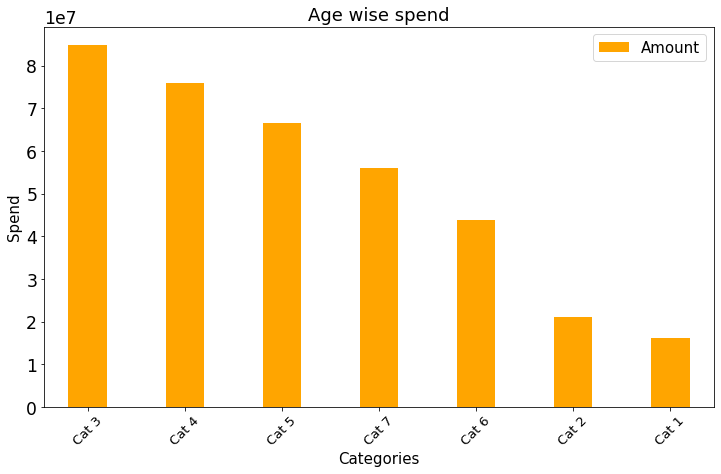

In [33]:
cust_spend.groupby(['Age Category'])[['Amount']].sum().sort_values('Amount', ascending=False).plot(kind='bar', width=0.4, color='orange')
plt.legend(loc="upper right", fontsize=15)
plt.title('Age wise spend', fontsize=18)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Spend', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.gca().grid(False)
plt.gcf().set_size_inches(12,7)

The same metrics when visualized yearly can be as below:

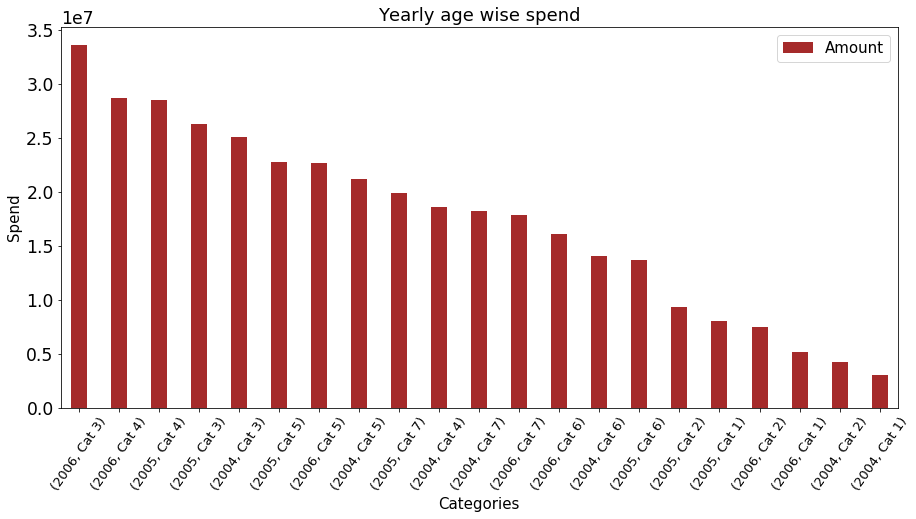

In [34]:
cust_spend.groupby(['Year', 'Age Category'])[['Amount']].sum().sort_values('Amount', ascending=False).plot(kind='bar', width=0.4, color='brown')
plt.legend(loc="upper right", fontsize=15)
plt.title('Yearly age wise spend', fontsize=18)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Spend', fontsize=15)
plt.xticks(rotation=55, fontsize=13)
plt.gca().grid(False)
plt.gcf().set_size_inches(15,7)

Based on the above, maximum expenditures have been done by customers falling under age group of 25-34 years and that too in the year 2006

<b>2i) - Who are the top 10 customers in terms of repayment?</b>

In [35]:
cust_repayed.groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10]
# Below are the top 10 customers who had highest total repayment amounts fy2004-2006

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


#### Part 3
<b>Calculate the city wise spend on each product on yearly basis. Also include a graphical
representation for the same.</b>

In [36]:
# City Wise Spend on each product on yearly basis
cust_spend.groupby(['Year', 'City', 'Product', 'Prod Cat'])[['Amount']].sum().head(20)

Amount
Year City      Product  Prod Cat            
2004 BANGALORE Gold     G1        9289878.54
               Platinum P2        2187536.08
                        P3        1484356.04
                        P6        1263699.91
                        P8        1111171.90
               Silver   S2        2082326.13
                        S4        2620200.12
                        S5        2071375.40
     BOMBAY    Gold     G1        6987853.53
               Platinum P3        2557949.48
                        P4        1607065.42
                        P6         446537.91
                        P7         588028.19
               Silver   S5        3061805.08
     CALCUTTA  Gold     G1        7477140.98
               Platinum P1        1867679.80
                        P5         932142.72
                        P6        1641304.35
                        P7        1520039.06
               Silver   S3        1932161.18

In [37]:
# Maximum spends city wise for product
cust_spend.groupby(['Year', 'City', 'Product', 'Prod Cat'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10]

Amount
Year City      Product Prod Cat             
2005 BANGALORE Gold    G1        12892362.99
     COCHIN    Gold    G1        12110613.03
2006 BANGALORE Gold    G1        12030611.09
     CALCUTTA  Gold    G1        11167532.77
     COCHIN    Gold    G1        10499142.38
2005 CALCUTTA  Gold    G1        10303355.80
2004 BANGALORE Gold    G1         9289878.54
2005 BOMBAY    Gold    G1         8983018.28
2006 BOMBAY    Gold    G1         7917144.31
2004 CALCUTTA  Gold    G1         7477140.98

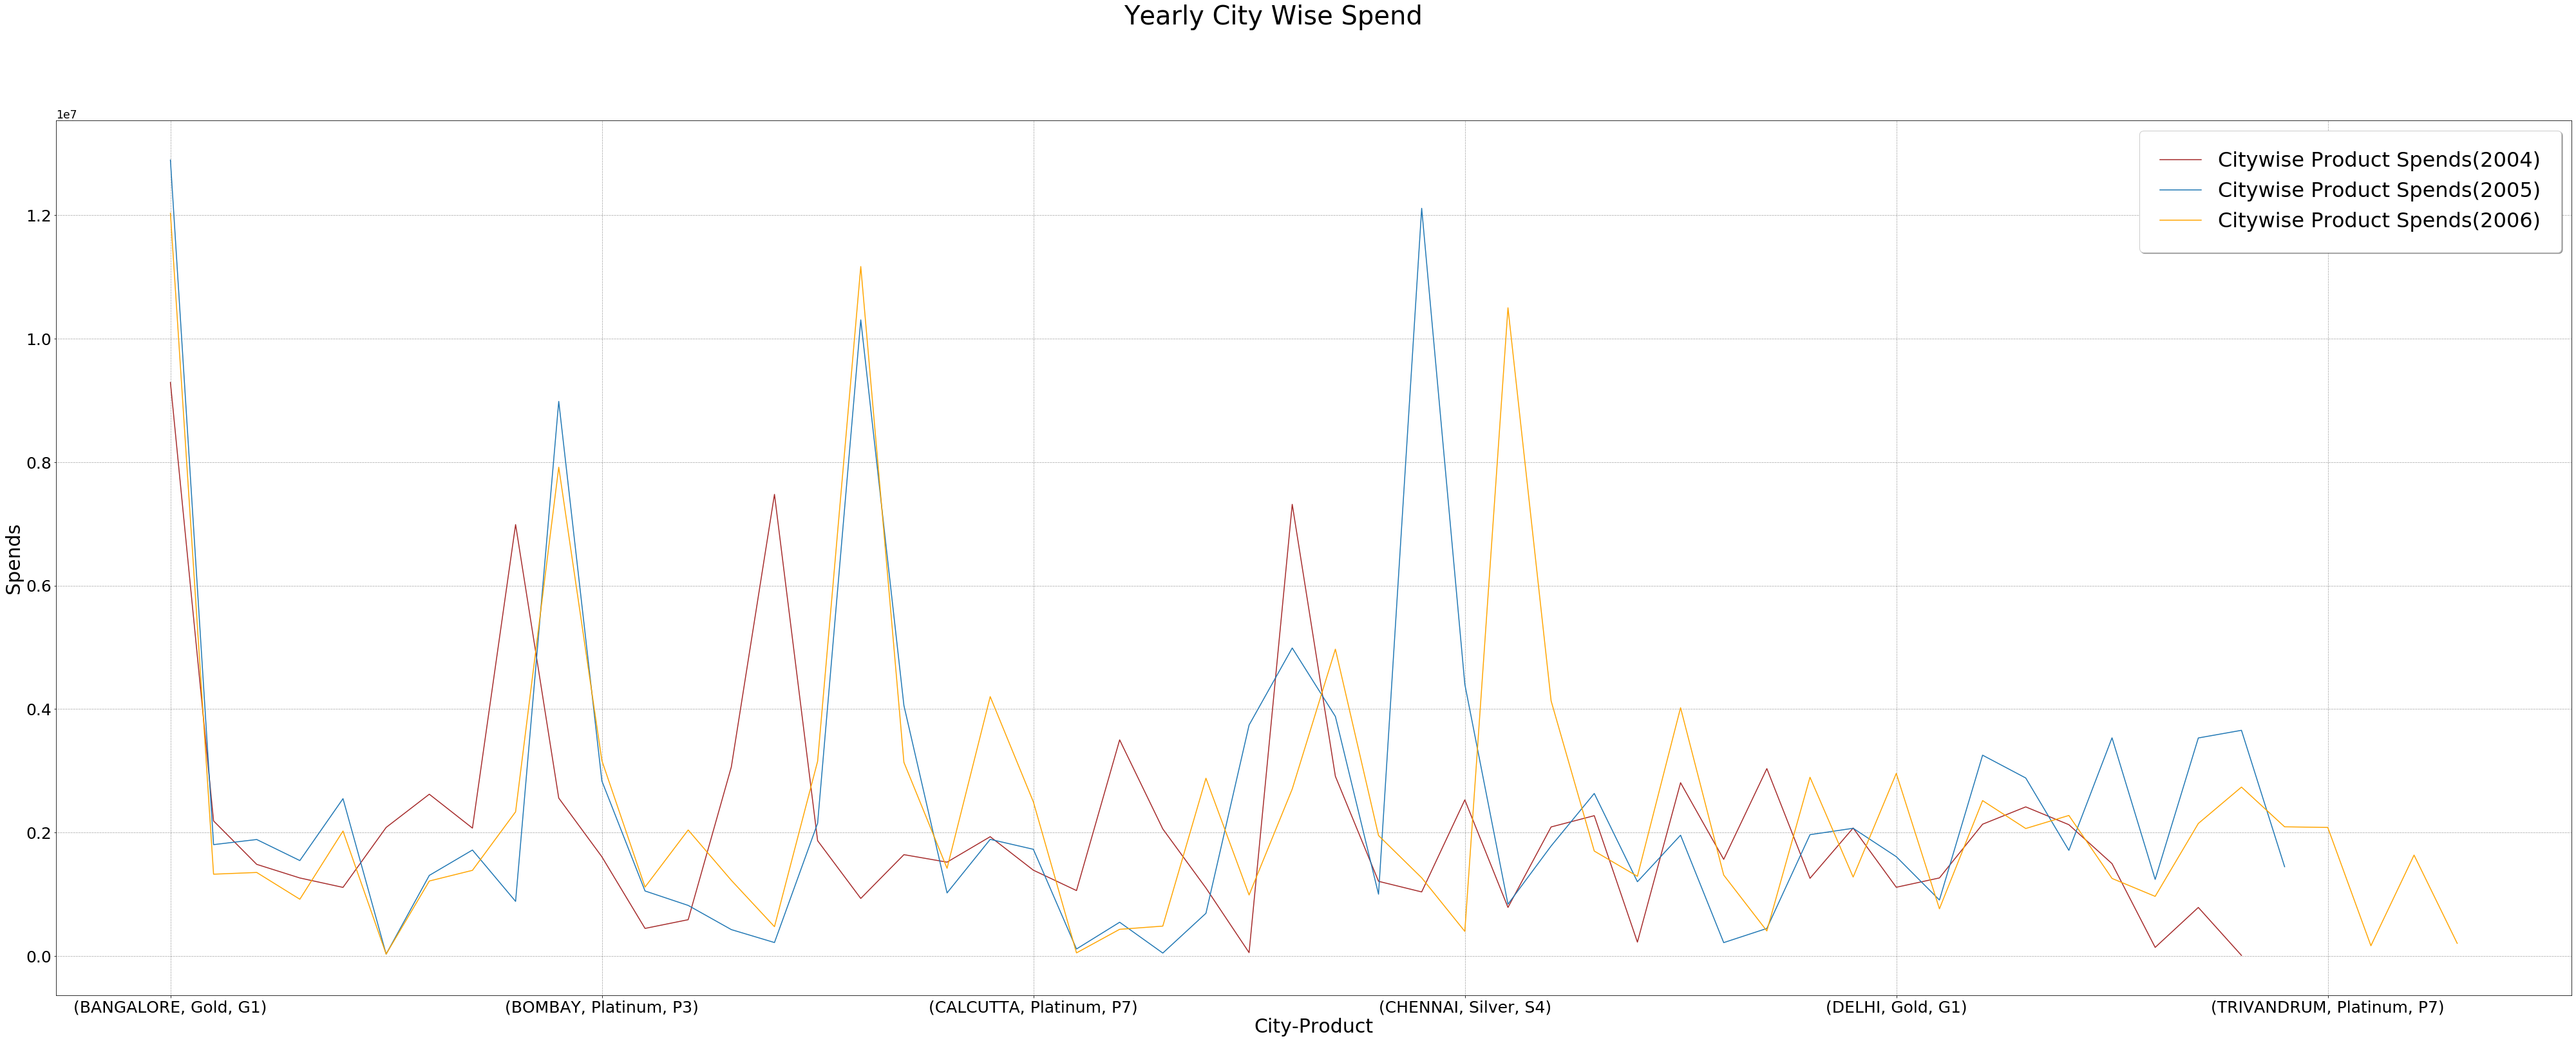

In [38]:
mon_prod_spend_04 = cust_spend[cust_spend['Year']==2004].groupby(['City', 'Product', 'Prod Cat'])[['Amount']].sum()
mon_prod_spend_05 = cust_spend[cust_spend['Year']==2005].groupby(['City', 'Product', 'Prod Cat'])[['Amount']].sum()
mon_prod_spend_06 = cust_spend[cust_spend['Year']==2006].groupby(['City', 'Product', 'Prod Cat'])[['Amount']].sum()
# Graphically the same can be visualized via a line plot saved as "City wise yearly spend for each product.pdf"
with PdfPages('City wise yearly metrics for each product.pdf') as pdf:
    fig, ax = plt.subplots()
    mon_prod_spend_04.plot(color='brown', ax = ax, label='Citywise Product Spends(2004)')
    mon_prod_spend_05.plot(ax = ax, label='Citywise Product Spends(2005)')
    mon_prod_spend_06.plot(color='orange', ax = ax, label='Citywise Product Spends(2006)')
    #plt.plot(mon_prod_spend_04['Year'], mon_prod_spend_04['Amount'], marker='o', linewidth=3, label='Citywise Product Spends(2004)')
    #plt.plot(mon_prod_spend_05['Year'], mon_prod_spend_05['Amount'], marker='o', linewidth=3, label='Citywise Product Spends(2005)')
    #plt.plot(mon_prod_spend_06['Year'], mon_prod_spend_06['Amount'], marker='o', linewidth=3, label='Citywise Product Spends(2006)')
    plt.legend(['Citywise Product Spends(2004)', 'Citywise Product Spends(2005)', 'Citywise Product Spends(2006)'], loc="upper right",
              fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=32)
    plt.suptitle('Yearly City Wise Spend', fontsize=40)
    plt.xlabel('City-Product', fontsize=30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.ylabel('Spends', fontsize=30)
    plt.gca().grid(True)
    plt.gcf().set_size_inches(70,25)
    pdf.savefig()
    plt.show()
    plt.close()

Based on the above figure, it can be clearly derived that the highest expenditure was originated from Bangalore in the year 2004 via a Gold G1 category customer. The above is also saved as the "City wise yearly metrics for each product.pdf"

### Part 4
<b>4a) - Monthly comparison of total spends, city wise</b>

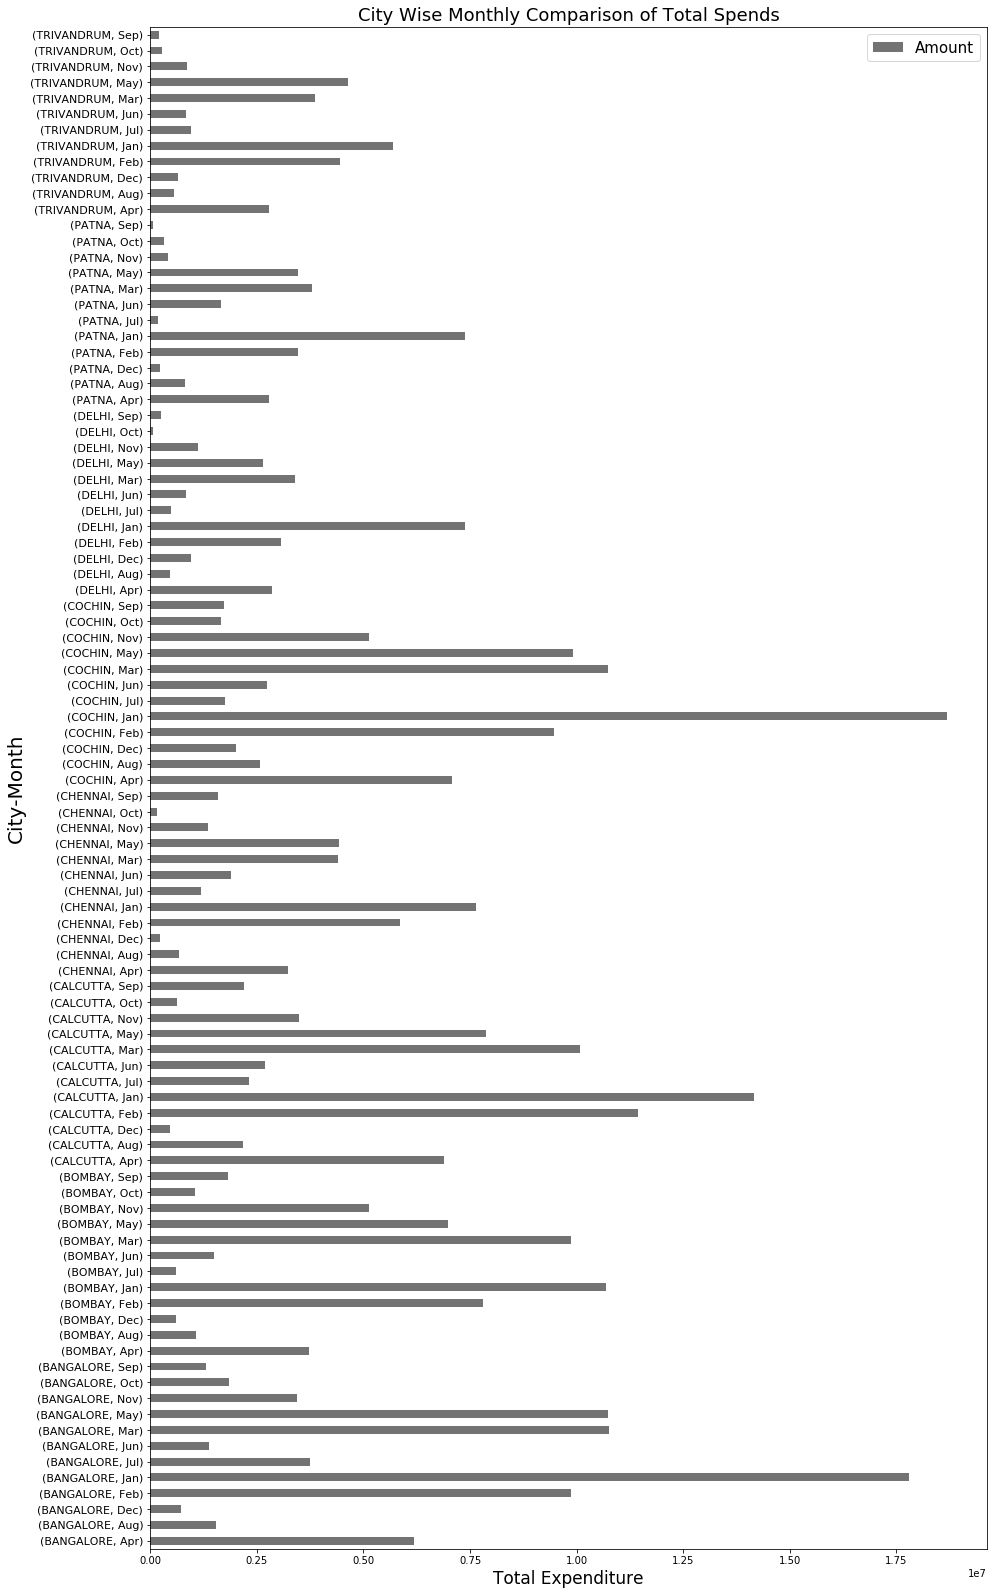

In [39]:
cust_spend.groupby(['City', 'Mon'])[['Amount']].sum().plot(kind='barh', color='0.45')
plt.legend(loc="upper right", fontsize=15)
plt.title('City Wise Monthly Comparison of Total Spends', fontsize=18)
plt.ylabel('City-Month', fontsize=20)
plt.xlabel('Total Expenditure', fontsize=17)
plt.yticks(fontsize=11)
plt.gca().grid(False)
plt.gcf().set_size_inches(15,28)
plt.show()

From the above comparison, it is pretty clear that highest spends were of Cochin in the month of January's.<br />
Noticeable fact here is that this analysis does not take into account year wise spends. Fro year-wise analysis we do something like below:

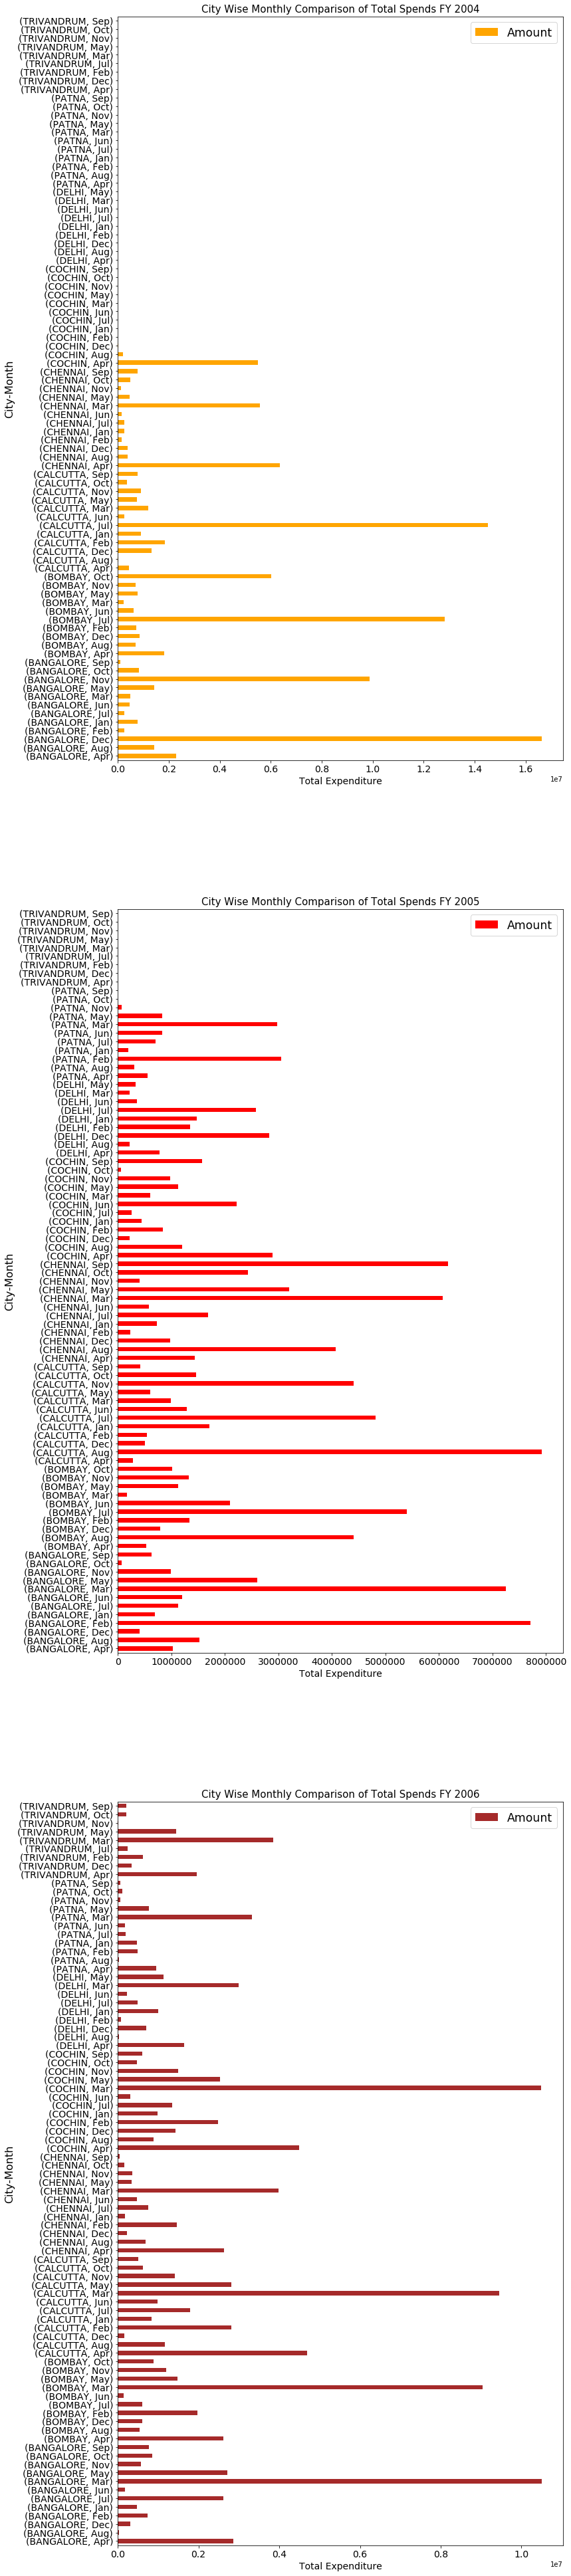

In [40]:
fig, ax = plt.subplots(nrows=3, sharex=False, sharey=True)
cust_spend[cust_spend['Year']==2004].groupby(['City', 'Mon'])[['Amount']].sum().plot(kind='barh', color='orange',ax=ax[0])
cust_spend[cust_spend['Year']==2005].groupby(['City', 'Mon'])[['Amount']].sum().plot(kind='barh', color='red',ax=ax[1])
cust_spend[cust_spend['Year']==2006].groupby(['City', 'Mon'])[['Amount']].sum().plot(kind='barh', color='brown',ax=ax[2])
#fig.legend([], loc="upper right", fontsize=15)
ax[0].set_title('City Wise Monthly Comparison of Total Spends FY 2004', fontsize=15)
ax[1].set_title('City Wise Monthly Comparison of Total Spends FY 2005', fontsize=15)
ax[2].set_title('City Wise Monthly Comparison of Total Spends FY 2006', fontsize=15)
ax[0].set_ylabel('City-Month', fontsize=16)
ax[1].set_ylabel('City-Month', fontsize=16)
ax[2].set_ylabel('City-Month', fontsize=16)
ax[0].set_xlabel('Total Expenditure', fontsize=14)
ax[1].set_xlabel('Total Expenditure', fontsize=14)
ax[2].set_xlabel('Total Expenditure', fontsize=14)
plt.setp(ax[0].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[1].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[2].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)
plt.setp(ax[2].get_yticklabels(), fontsize=14)
plt.gcf().set_size_inches(12,70)
plt.show()

Here are the yearly observations which make much more sense -<br />
- FY 2004 => Bangalore had the highest expenditures that too in the month of December (which makes sense December being the end of year, christmas, bangalore being a hi-tech city as such and all that)
- FY 2005 => Calcutta is seen to have the highest expenditure in the month of August (reason aren't that clear though)
- FY 2006 => Cochin and Bangalore both in the month of March seem to have equivalent expenditures (making it seem like some kind of festival relating to these areas)

<b>4b) - Comparison of yearly spend on air tickets</b>

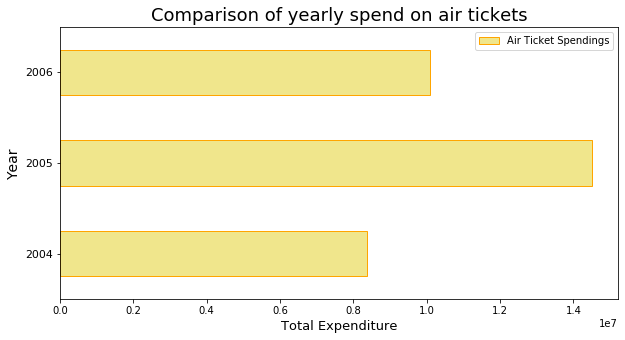

In [41]:
cust_spend[cust_spend['Type']=='AIR TICKET'].groupby(['Year'])[['Amount']].sum().rename({'Amount':'Air Ticket Spendings'}, axis=1).plot(kind='barh', color='khaki', edgecolor='orange')
plt.legend(loc="upper right", fontsize=10)
plt.title('Comparison of yearly spend on air tickets', fontsize=18)
plt.ylabel('Year', fontsize=14)
plt.xlabel('Total Expenditure', fontsize=13)
plt.yticks(fontsize=11)
plt.gca().grid(False)
plt.gcf().set_size_inches(10,5)
plt.show()

Conclusion: Year 2005 showed highest air tickets purchasings which in turn mean more travellings happend.

<b>4c) - Comparison of monthly spend for each product (look for any seasonality
that exists in terms of spend)</b>

In [42]:
# FY 2004
cust_spend[cust_spend.Year==2004].groupby(['Product', 'Mon'])[['Amount']].sum().rename({'Amount':'Spent Amount'}, axis=1).fillna(0).sort_values('Spent Amount', ascending=False)

Spent Amount
Product  Mon              
Gold     Jan   28837092.88
Platinum Jan   28795654.56
Silver   Jan   19642857.64
Gold     Feb    3198850.31
         Apr    2690380.77
Silver   Apr    2077523.64
Platinum Apr    1819712.63
         Sep    1816183.55
         Feb    1769237.83
         Nov    1629263.62
Gold     May    1601677.48
Silver   Nov    1497564.35
Gold     Sep    1343862.61
Silver   Feb    1225939.42
         Sep    1192881.21
         Mar    1127369.92
Gold     Mar    1092661.79
Platinum Mar    1030013.96
         May     818552.99
Gold     Nov     659981.60
Silver   May     625318.84

In [43]:
# FY 2005
cust_spend[cust_spend.Year==2005].groupby(['Product', 'Mon'])[['Amount']].sum().rename({'Amount':'Spent Amount'}, axis=1).fillna(0).sort_values('Spent Amount', ascending=False)

Spent Amount
Product  Mon              
Gold     Feb   17359157.23
Platinum Feb   15601838.88
         May   14692437.76
Gold     May   14024090.17
Silver   May    5680984.23
         Feb    5645786.90
Gold     Jun    5250066.70
         Nov    5233151.27
Platinum Nov    4730264.46
         Jun    4151149.69
         Jan    4068395.95
Gold     Jan    3111426.90
Platinum Apr    3097516.32
Gold     Aug    2925282.74
         Apr    2646922.16
Platinum Aug    2581877.78
Silver   Nov    2054603.83
         Jun    1631684.35
Platinum Jul    1402579.46
Silver   Apr    1316638.66
Platinum Oct    1258725.24
Gold     Sep    1181458.46
         Jul    1121173.40
Silver   Aug    1037409.24
         Jan    1016935.59
Platinum Sep    1006207.63
         Dec    1001201.85
Gold     Oct     970641.36
Silver   Jul     683880.43
Gold     Dec     664762.18
Silver   Oct     494594.37
         Sep     453660.74
         Dec     399078.81

In [44]:
# FY 2006
cust_spend[cust_spend.Year==2006].groupby(['Product', 'Mon'])[['Amount']].sum().rename({'Amount':'Spent Amount'}, axis=1).fillna(0).sort_values('Spent Amount', ascending=False)

,,Spent Amount
Product,Mon,
Platinum,Mar,21609423.74
Gold,Mar,18164310.69
Silver,Mar,13861305.94
Platinum,Apr,7881269.39
Gold,Apr,7833269.66
Silver,Apr,6137543.90
Gold,May,5922402.11
Platinum,Feb,4710335.03
Gold,Feb,4221172.01


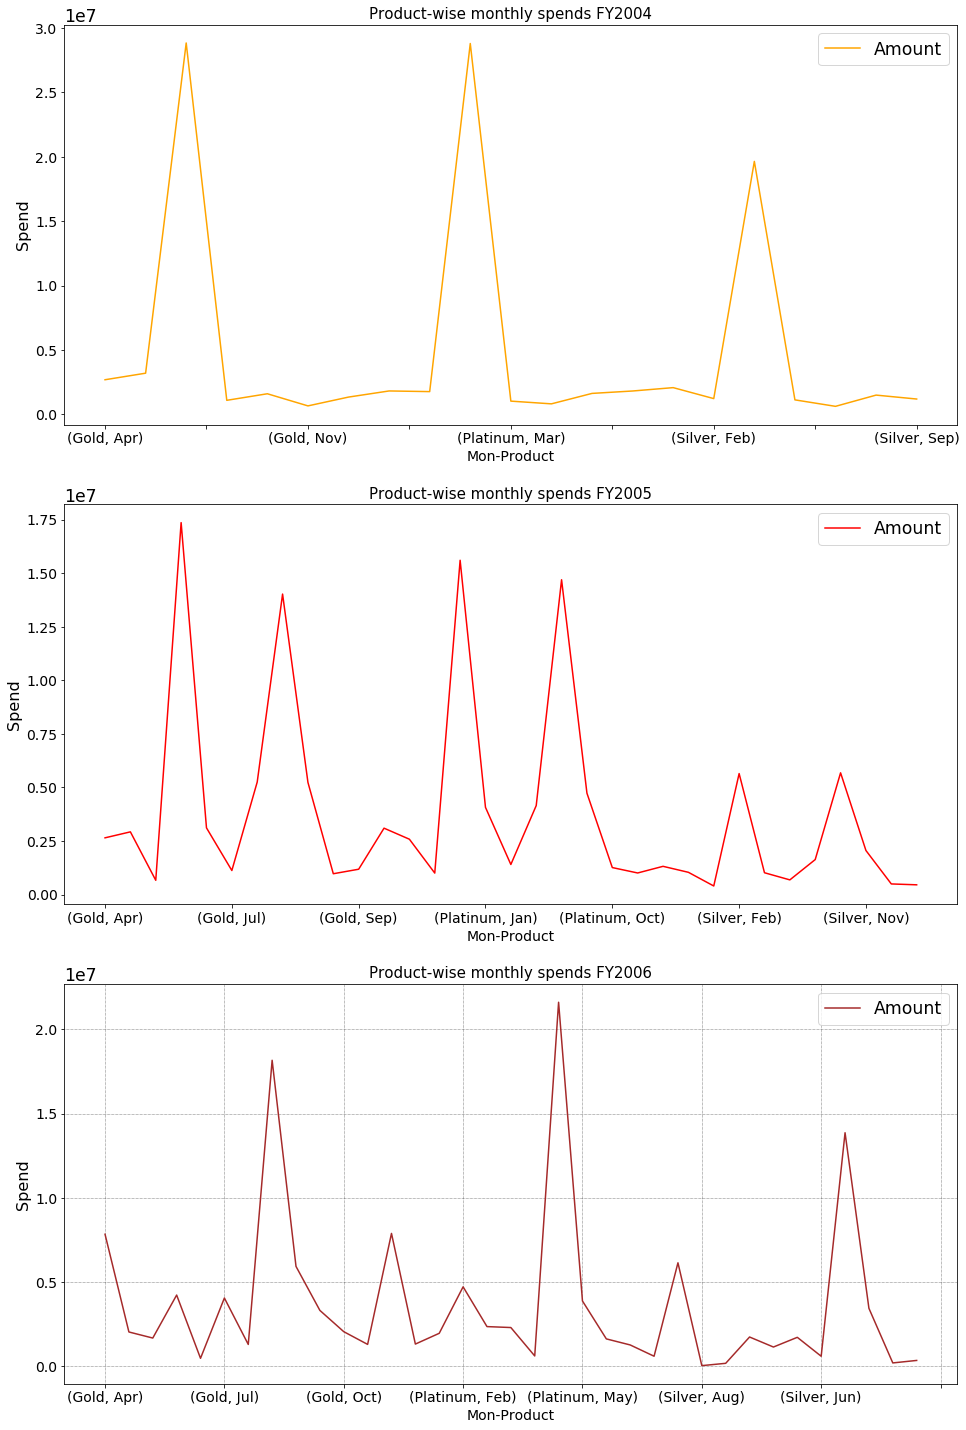

In [45]:
fig, ax = plt.subplots(nrows=3, sharex=False, sharey=False)
cust_spend[cust_spend.Year==2004].groupby(['Product', 'Mon'])[['Amount']].sum().rename({'Amount':'Spent Amount'}).fillna(0).plot(color='orange', ax=ax[0])
cust_spend[cust_spend.Year==2005].groupby(['Product', 'Mon'])[['Amount']].sum().rename({'Amount':'Spent Amount'}).fillna(0).plot(color='red', ax=ax[1])
cust_spend[cust_spend.Year==2006].groupby(['Product', 'Mon'])[['Amount']].sum().rename({'Amount':'Spent Amount'}).fillna(0).plot(color='brown', ax=ax[2])
plt.rcParams['axes.grid'] = True

#fig.legend([], loc="upper right", fontsize=15)
ax[0].set_title('Product-wise monthly spends FY2004', fontsize=15)
ax[1].set_title('Product-wise monthly spends FY2005', fontsize=15)
ax[2].set_title('Product-wise monthly spends FY2006', fontsize=15)
ax[0].set_ylabel('Spend', fontsize=16)
ax[1].set_ylabel('Spend', fontsize=16)
ax[2].set_ylabel('Spend', fontsize=16)
ax[0].set_xlabel('Mon-Product', fontsize=14)
ax[1].set_xlabel('Mon-Product', fontsize=14)
ax[2].set_xlabel('Mon-Product', fontsize=14)
plt.setp(ax[0].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[1].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[2].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)
plt.setp(ax[2].get_yticklabels(), fontsize=14)
fig.gca().grid(True)
plt.gcf().set_size_inches(16,25)
plt.show()  

The same can be also be depicted via horizontal bar charts which shows a spike in the usage around Jan for Platinum, Gold and Silver customers

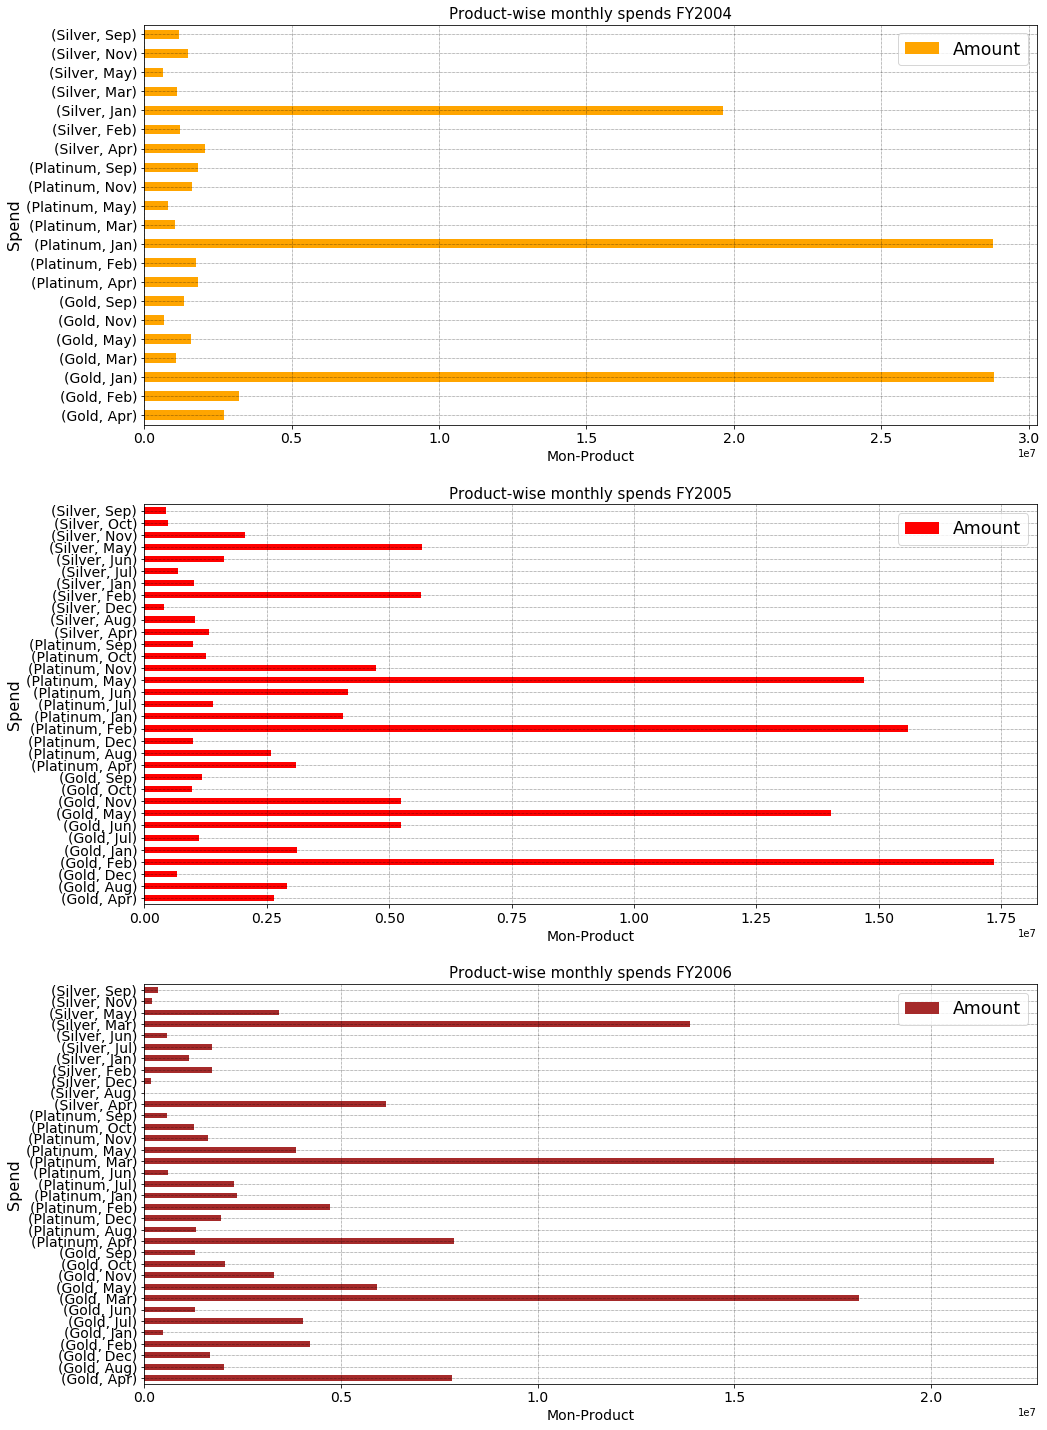

In [46]:
fig, ax = plt.subplots(nrows=3, sharex=False, sharey=False)
cust_spend[cust_spend.Year==2004].groupby(['Product', 'Mon'])[['Amount']].sum().rename({'Amount':'Spent Amount'}).fillna(0).plot(kind='barh', color='orange', ax=ax[0])
cust_spend[cust_spend.Year==2005].groupby(['Product', 'Mon'])[['Amount']].sum().rename({'Amount':'Spent Amount'}).fillna(0).plot(kind='barh', color='red', ax=ax[1])
cust_spend[cust_spend.Year==2006].groupby(['Product', 'Mon'])[['Amount']].sum().rename({'Amount':'Spent Amount'}).fillna(0).plot(kind='barh', color='brown', ax=ax[2])
plt.rcParams['axes.grid'] = True

#fig.legend([], loc="upper right", fontsize=15)
ax[0].set_title('Product-wise monthly spends FY2004', fontsize=15)
ax[1].set_title('Product-wise monthly spends FY2005', fontsize=15)
ax[2].set_title('Product-wise monthly spends FY2006', fontsize=15)
ax[0].set_ylabel('Spend', fontsize=16)
ax[1].set_ylabel('Spend', fontsize=16)
ax[2].set_ylabel('Spend', fontsize=16)
ax[0].set_xlabel('Mon-Product', fontsize=14)
ax[1].set_xlabel('Mon-Product', fontsize=14)
ax[2].set_xlabel('Mon-Product', fontsize=14)
plt.setp(ax[0].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[1].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[2].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)
plt.setp(ax[2].get_yticklabels(), fontsize=14)
fig.gca().grid(True)
plt.gcf().set_size_inches(16,25)
plt.show() 

Inference drawn from the above plots :<br />
- The seasonality effect is that there is a spike in the expenditures of Gold, Platinum and Silver(S5) customers in the short period from Apr-May. This may be happening because the financial year comes to an end and customers may be investing in some sort of future plannings based on the business or market status.
- Also, this trend seems to shift a little bit to the right each year.

### Part 5
<b>Write user defined PYTHON function to perform the following analysis:<br />
We need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.</b>

In [47]:
cust_repayed

,Customer,Month,Amount,Mon,Year,Prod Cat,City,Product
SL No:,,,,,,,,
1,A1,12-Jan-04,495414.75,Jan,2004,G1,BANGALORE,Gold
2,A1,3-Jan-04,245899.02,Jan,2004,G1,BANGALORE,Gold
3,A1,15-Jan-04,259490.06,Jan,2004,G1,BANGALORE,Gold
4,A1,25-Jan-04,437555.12,Jan,2004,G1,BANGALORE,Gold
5,A1,17-Jan-05,165972.88,Jan,2005,G1,BANGALORE,Gold
...,...,...,...,...,...,...,...,...
1496,A67,9-May-05,55638.77,May,2005,G1,CHENNAI,Gold
1497,A68,10-May-06,319836.49,May,2006,S5,TRIVANDRUM,Silver
1498,A69,11-Jul-06,247628.45,Jul,2006,P8,CALCUTTA,Platinum


In [48]:
def top10Cust(prod="", period=""):
    if(len(prod)==0 & len(period)==0): # Case when both product and time period are not mentioned
        #top10CustDf = cust_repayed.groupby(['City'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10]
        print("Top 10 Customers from Bangalore-")
        print(cust_repayed[(cust_repayed.City=="BANGALORE")].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Bombay -")
        print(cust_repayed[(cust_repayed.City=="BOMBAY")].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Calcutta -")
        print(cust_repayed[(cust_repayed.City=="CALCUTTA")].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Chennai -")
        print(cust_repayed[(cust_repayed.City=="CHENNAI")].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Cochin -")
        print(cust_repayed[(cust_repayed.City=="COCHIN")].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Trivandrum -")
        print(cust_repayed[(cust_repayed.City=="TRIVANDRUM")].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
    elif (len(prod)==0): # Case when product is not mentioned
        #top10CustDf = cust_repayed.groupby(['City'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10]
        if(period=="yearly"): # Yearly Analysis
            print("Yearly Data FY2004-2006 :-\n")
            print("Top 10 Customers from Bangalore -")
            print(cust_repayed[(cust_repayed.City=="BANGALORE") & (cust_repayed.Year==2004)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="BANGALORE") & (cust_repayed.Year==2005)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="BANGALORE") & (cust_repayed.Year==2006)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Bombay -")
            print(cust_repayed[(cust_repayed.City=="BOMBAY") & (cust_repayed.Year==2004)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="BOMBAY") & (cust_repayed.Year==2005)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="BOMBAY") & (cust_repayed.Year==2006)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Calcutta -")
            print(cust_repayed[(cust_repayed.City=="CALCUTTA") & (cust_repayed.Year==2004)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="CALCUTTA") & (cust_repayed.Year==2005)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="CALCUTTA") & (cust_repayed.Year==2006)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Chennai -")
            print(cust_repayed[(cust_repayed.City=="CHENNAI") & (cust_repayed.Year==2004)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="CHENNAI") & (cust_repayed.Year==2005)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="CHENNAI") & (cust_repayed.Year==2006)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Cochin -")
            print(cust_repayed[(cust_repayed.City=="COCHIN") & (cust_repayed.Year==2004)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="COCHIN") & (cust_repayed.Year==2005)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="COCHIN") & (cust_repayed.Year==2006)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Trivandrum -")
            print(cust_repayed[(cust_repayed.City=="TRIVANDRUM") & (cust_repayed.Year==2004)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="TRIVANDRUM") & (cust_repayed.Year==2005)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="TRIVANDRUM") & (cust_repayed.Year==2006)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        else:  # Monthly analysis
            print("Top 10 Customers from Bangalore-")
            print(cust_repayed[(cust_repayed.City=="BANGALORE")].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Bombay -")
            print(cust_repayed[(cust_repayed.City=="BOMBAY")].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Calcutta -")
            print(cust_repayed[(cust_repayed.City=="CALCUTTA")].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Chennai -")
            print(cust_repayed[(cust_repayed.City=="CHENNAI")].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Cochin -")
            print(cust_repayed[(cust_repayed.City=="COCHIN")].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Trivandrum -")
            print(cust_repayed[(cust_repayed.City=="TRIVANDRUM")].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
    elif (len(period)==0):   # Case when time period is not mentioned
        print("For {} Product :-\n".format(prod))
        print("Top 10 Customers from Bangalore-")
        print(cust_repayed[(cust_repayed.City=="BANGALORE") & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Bombay -")
        print(cust_repayed[(cust_repayed.City=="BOMBAY") & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Calcutta -")
        print(cust_repayed[(cust_repayed.City=="CALCUTTA") & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Chennai -")
        print(cust_repayed[(cust_repayed.City=="CHENNAI") & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Cochin -")
        print(cust_repayed[(cust_repayed.City=="COCHIN") & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        print("\nTop 10 Customers from Trivandrum -")
        print(cust_repayed[(cust_repayed.City=="TRIVANDRUM") & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
    else:    # Case when both product and time period are mentioned
        if(period=="yearly"):   # Yearly Analysis
            print("For {} Customers, Yearly Data FY2004-2006 :-\n".format(prod))
            print("Top 10 Customers from Bangalore -")
            print(cust_repayed[(cust_repayed.City=="BANGALORE") & (cust_repayed.Year==2004) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="BANGALORE") & (cust_repayed.Year==2005) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="BANGALORE") & (cust_repayed.Year==2006) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Bombay -")
            print(cust_repayed[(cust_repayed.City=="BOMBAY") & (cust_repayed.Year==2004) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="BOMBAY") & (cust_repayed.Year==2005) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="BOMBAY") & (cust_repayed.Year==2006) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Calcutta -")
            print(cust_repayed[(cust_repayed.City=="CALCUTTA") & (cust_repayed.Year==2004) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="CALCUTTA") & (cust_repayed.Year==2005) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="CALCUTTA") & (cust_repayed.Year==2006) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Chennai -")
            print(cust_repayed[(cust_repayed.City=="CHENNAI") & (cust_repayed.Year==2004) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="CHENNAI") & (cust_repayed.Year==2005) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="CHENNAI") & (cust_repayed.Year==2006) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Cochin -")
            print(cust_repayed[(cust_repayed.City=="COCHIN") & (cust_repayed.Year==2004) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="COCHIN") & (cust_repayed.Year==2005) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="COCHIN") & (cust_repayed.Year==2006) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Trivandrum -")
            print(cust_repayed[(cust_repayed.City=="TRIVANDRUM") & (cust_repayed.Year==2004) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="TRIVANDRUM") & (cust_repayed.Year==2005) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print(cust_repayed[(cust_repayed.City=="TRIVANDRUM") & (cust_repayed.Year==2006) & (cust_repayed.Product==prod)].groupby(['Customer'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
        else:   # Monthly analysis
            print("For {} Customers, Monthly Data :-\n".format(prod))
            print("Top 10 Customers from Bangalore-")
            print(cust_repayed[(cust_repayed.City=="BANGALORE") & (cust_repayed.Product==prod)].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Bombay -")
            print(cust_repayed[(cust_repayed.City=="BOMBAY") & (cust_repayed.Product==prod)].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Calcutta -")
            print(cust_repayed[(cust_repayed.City=="CALCUTTA") & (cust_repayed.Product==prod)].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Chennai -")
            print(cust_repayed[(cust_repayed.City=="CHENNAI") & (cust_repayed.Product==prod)].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Cochin -")
            print(cust_repayed[(cust_repayed.City=="COCHIN") & (cust_repayed.Product==prod)].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])
            print("\nTop 10 Customers from Trivandrum -")
            print(cust_repayed[(cust_repayed.City=="TRIVANDRUM") & (cust_repayed.Product==prod)].groupby(['Customer', 'Mon'])[['Amount']].sum().sort_values('Amount', ascending=False)[0:10])

Let's test the above function via various inputs below:<br />
<b>Test Case 1:</b> Top 10 customers for each city in terms of their repayment amount (No Product or Time Period Specified)

In [49]:
top10Cust()

Top 10 Customers from Bangalore-
              Amount
Customer            
A13       9572000.66
A43       8489871.46
A14       7943268.63
A37       7535804.83
A23       6695551.74
A30       6133481.96
A18       5309969.03
A59       4775019.15
A1        4753691.67
A52       4495088.33

Top 10 Customers from Bombay -
              Amount
Customer            
A22       9372561.68
A12       8334760.16
A42       7615460.86
A36       7574765.88
A17       5284374.99
A62       4969817.15
A33       4803673.14
A51       3736577.61
A4        2505856.70
A70        781655.88

Top 10 Customers from Calcutta -
              Amount
Customer            
A60       9876290.74
A40       6990749.27
A49       6907115.36
A29       6517871.16
A15       5555412.83
A20       4836953.50
A58       4024959.75
A10       3695647.52
A31       3384039.25
A2        2819278.34

Top 10 Customers from Chennai -
              Amount
Customer            
A38       7470956.35
A47       7286876.96
A27       7012900.56
A56    

<b>Test Case 2 :</b> Top 10 customers for each city in terms of their repayment amount by product="Platinum" (Time Period unspecified)

In [50]:
top10Cust("Platinum")

For Platinum Product :-

Top 10 Customers from Bangalore-
              Amount
Customer            
A37       7535804.83
A52       4495088.33
A19       3998369.81
A5        3040486.95

Top 10 Customers from Bombay -
              Amount
Customer            
A36       7574765.88
A33       4803673.14
A51       3736577.61
A4        2505856.70
A70        781655.88
A71         87284.07

Top 10 Customers from Calcutta -
              Amount
Customer            
A40       6990749.27
A49       6907115.36
A20       4836953.50
A34       2200372.04
A69        388161.53
A98        337815.57
A99         25682.73

Top 10 Customers from Chennai -
              Amount
Customer            
A38       7470956.35
A47       7286876.96
A56       4299073.46

Top 10 Customers from Cochin -
              Amount
Customer            
A21       9056336.15
A54       5575582.12
A41       5480598.54
A50       4189968.57
A35       3207157.67
A3        2630532.83
A83        132844.13

Top 10 Customers from Trivandrum 

<b>Test Case 3 :</b> Top 10 customers for each city in terms of their repayment amount by product="Silver" and time period = monthly

In [51]:
top10Cust("Silver", "monthly")

For Silver Customers, Monthly Data :-

Top 10 Customers from Bangalore-
                  Amount
Customer Mon            
A18      Mar  1950621.08
A23      May  1689987.35
         Jan  1597308.11
A59      Jan  1413237.57
A18      Jan  1311365.95
A23      Feb  1126204.86
A59      May  1103289.20
         Mar  1023373.68
A23      Nov   868999.95
A18      May   614485.57

Top 10 Customers from Bombay -
                  Amount
Customer Mon            
A22      Jan  3832158.23
         May  1572707.93
         Apr  1071163.10
         Feb   763844.22
         Mar   592019.65
         Sep   557254.77
A75      Feb   481338.08
A80      Mar   481205.64
A22      Jun   408935.99
         Jul   238688.54

Top 10 Customers from Calcutta -
                  Amount
Customer Mon            
A58      Mar  1359507.93
A2       Feb   977706.78
A58      May   677414.29
         Feb   563643.01
         Jan   503175.35
A2       Apr   487937.91
         Jan   484155.45
A58      Jun   463913.14
A87      Mar

<b>Test Case 3 :</b> Top 10 customers for each city in terms of their repayment amount by product="Platinum" and time period = yearly

In [52]:
top10Cust("Platinum", "yearly")

For Platinum Customers, Yearly Data FY2004-2006 :-

Top 10 Customers from Bangalore -
              Amount
Customer            
A37       1702553.35
A5        1126386.11
A19        791528.29
A52        673659.66
              Amount
Customer            
A37       2835156.31
A52       1664637.43
A19       1513239.91
A5        1165614.90
              Amount
Customer            
A37       2998095.17
A52       2156791.24
A19       1693601.61
A5         748485.94

Top 10 Customers from Bombay -
              Amount
Customer            
A36       1993579.00
A51       1269039.52
A4         572463.32
A33        453268.40
A71         56286.33
              Amount
Customer            
A36       2241604.67
A33       1360020.56
A4         926469.89
A51        873753.76
A70        781655.88
A71         30997.74
              Amount
Customer            
A36       3339582.21
A33       2990384.18
A51       1593784.33
A4        1006923.49

Top 10 Customers from Calcutta -
              Amount
Customer

### With this the Case Study on Credit Cards comes to an end!
I sincerely hope Mr. Jim Watson got all the answers he hoped for :)